In [ ]:

\\\
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
#paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')
#tawsifurrahman_tuberculosis_tb_chest_xray_dataset_path = kagglehub.dataset_download('tawsifurrahman/tuberculosis-tb-chest-xray-dataset')

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --unzip
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset --unzip




print('Data source import complete.')


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:17<00:00, 136MB/s]
100% 2.29G/2.29G [00:17<00:00, 137MB/s]
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 98% 651M/663M [00:03<00:00, 215MB/s]
100% 663M/663M [00:03<00:00, 220MB/s]
Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle
!echo {"username":"koechdeborah","key":"6c8e41b80de08bc80f1d08b426d914de"} > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
os.listdir()

['.config', 'TB_Chest_Radiography_Database', 'chest_xray', 'sample_data']

### Importing required libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


import tensorflow as tf

#import sklearn.model_selection
#import sklearn.metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.utils import plot_model
from tensorflow import keras

## Importing the Pneumonia dataset

In [ ]:

BASE_DIR = "chest_xray"

## Get names of file in folder(names of pic) by path of folder

In [ ]:
normal_folder_test = os.path.join(BASE_DIR, "test/NORMAL/")
pneumonia_folder_test = os.path.join(BASE_DIR, "test/PNEUMONIA/")
normal_folder_train = os.path.join(BASE_DIR, "train/NORMAL/")
pneumonia_folder_train = os.path.join(BASE_DIR, "train/PNEUMONIA/")
normal_folder_validate = os.path.join(BASE_DIR, "val/NORMAL/")
pneumonia_folder_validate = os.path.join(BASE_DIR, "val/PNEUMONIA/")

In [ ]:
name_files_normal_train = os.listdir(normal_folder_train)
name_files_pneumonia_train = os.listdir(pneumonia_folder_train)
name_files_normal_test = os.listdir(normal_folder_test)
name_files_pneumonia_test = os.listdir(pneumonia_folder_test)
name_files_normal_validate = os.listdir(normal_folder_validate)
name_files_pneumonia_validate = os.listdir(pneumonia_folder_validate)

In [ ]:
print("Validation NORMAL files:", name_files_normal_validate)
print("Validation PNEUMONIA files:", name_files_pneumonia_validate)

Validation NORMAL files: ['NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg']
Validation PNEUMONIA files: ['person1946_bacteria_4875.jpeg', 'person1946_bacteria_4874.jpeg', 'person1950_bacteria_4881.jpeg', 'person1952_bacteria_4883.jpeg', 'person1949_bacteria_4880.jpeg', 'person1954_bacteria_4886.jpeg', 'person1951_bacteria_4882.jpeg', 'person1947_bacteria_4876.jpeg']


## Create dataframes of Image paths and assigning labels

In [ ]:
df_train_normal=pd.DataFrame(name_files_normal_train,columns=["images"])
df_train_normal["labels"]=0
df_train_normal["images"]=normal_folder_train+df_train_normal["images"]
#ADDING THE COMPLETE PATH OF IMAGES

df_train_pneumonia=pd.DataFrame(name_files_pneumonia_train,columns=["images"])
df_train_pneumonia["labels"]=1
df_train_pneumonia["images"]=pneumonia_folder_train+df_train_pneumonia["images"]

df_test_normal=pd.DataFrame(name_files_normal_test,columns=["images"])
df_test_normal["labels"]=0
df_test_normal["images"]=normal_folder_test+df_test_normal["images"]

df_test_pneumonia=pd.DataFrame(name_files_pneumonia_test,columns=["images"])
df_test_pneumonia["labels"]=1
df_test_pneumonia["images"]=pneumonia_folder_test+df_test_pneumonia["images"]

df_validate_normal=pd.DataFrame(name_files_normal_validate,columns=["images"])
df_validate_normal["labels"]=0
df_validate_normal["images"]=normal_folder_validate+df_validate_normal["images"]

df_validate_pneumonia=pd.DataFrame(name_files_pneumonia_validate,columns=["images"])
df_validate_pneumonia["labels"]=1
df_validate_pneumonia["images"]=pneumonia_folder_validate+df_validate_pneumonia["images"]

## Concating all these dataframes

In [ ]:
DF1=pd.concat([df_train_pneumonia,df_train_normal,df_test_pneumonia,df_test_normal,df_validate_pneumonia,df_validate_normal], ignore_index=True)
DF1.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels
0,chest_xray/train/PNEUMONIA/person1876_bacteria...,1
1,chest_xray/train/NORMAL/NORMAL2-IM-1317-0001.jpeg,0
2,chest_xray/train/PNEUMONIA/person511_virus_102...,1
3,chest_xray/train/PNEUMONIA/person1415_virus_24...,1
4,chest_xray/train/PNEUMONIA/person1241_bacteria...,1
...,...,...
5851,chest_xray/train/PNEUMONIA/person30_bacteria_1...,1
5852,chest_xray/train/NORMAL/IM-0249-0001.jpeg,0
5853,chest_xray/test/PNEUMONIA/person48_virus_100.jpeg,1
5854,chest_xray/test/PNEUMONIA/person1628_virus_282...,1


### Convert images to numpy array

In [ ]:
DF1["mat_images"]=DF1['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))

In [ ]:
DF1.labels.unique()

array([1, 0])

In [ ]:
DF1.mat_images[0][0]

array([  2,   1,   0,   1,   2,  13,  20,  22,  23,  30,  33,  34,  38,
        42,  42,  43,  42,  44,  56,  74,  77,  74,  78,  79,  81,  82,
        90,  89,  91,  93,  93,  96,  98,  98, 104, 102, 103, 104, 105,
       105, 106, 108, 111, 114, 124, 125, 127, 126, 128, 131, 132, 132,
       135, 135, 136, 140, 139, 137, 155, 165, 168, 164, 173, 188, 176,
       170, 166, 163, 162, 160, 159, 161, 163, 162, 159, 160, 159, 156,
       156, 156, 151, 150, 144, 146, 140, 141, 140, 143, 139, 139, 139,
       138, 135, 137, 135, 138, 146, 145, 146, 148, 148, 152, 143, 148,
       145, 149, 152, 159, 160, 160, 162, 164, 162, 158, 156, 155, 151,
       157, 153, 149, 151, 141, 143, 145, 154, 159, 154, 150, 151, 152,
       154, 154, 156, 154, 159, 169, 166, 163, 160, 152, 147, 142, 142,
       140, 139, 137, 140, 140, 147, 143, 138, 138, 138, 128, 126, 127,
       124, 121, 116, 110, 105, 115, 114, 112, 119, 122, 119, 116, 122,
       117, 125, 128, 142, 153, 164, 167, 168, 170, 160, 155, 14

In [ ]:
DF1.head()

,images,labels,mat_images
0,chest_xray/train/PNEUMONIA/person586_bacteria_...,1,"[[2, 1, 0, 1, 2, 13, 20, 22, 23, 30, 33, 34, 3..."
1,chest_xray/train/PNEUMONIA/person441_virus_894...,1,"[[0, 0, 0, 0, 0, 0, 11, 17, 31, 33, 37, 37, 40..."
2,chest_xray/train/PNEUMONIA/person512_bacteria_...,1,"[[30, 30, 30, 30, 26, 32, 35, 43, 46, 46, 54, ..."
3,chest_xray/train/PNEUMONIA/person896_bacteria_...,1,"[[82, 88, 90, 84, 86, 82, 83, 86, 88, 87, 90, ..."
4,chest_xray/train/PNEUMONIA/person1696_bacteria...,1,"[[52, 62, 50, 46, 66, 72, 76, 84, 81, 88, 84, ..."


## Displaying images

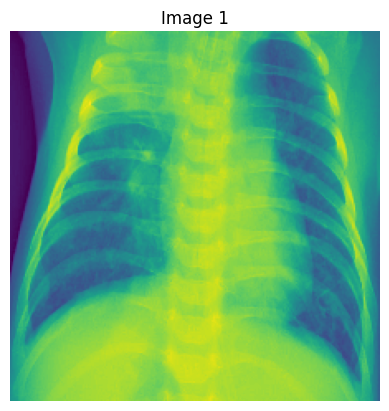

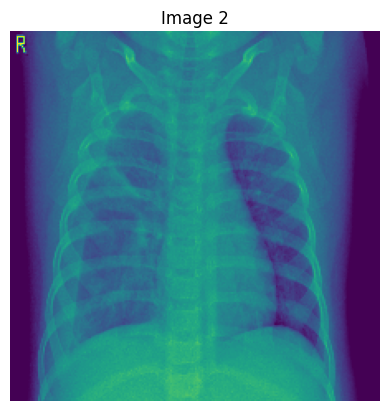

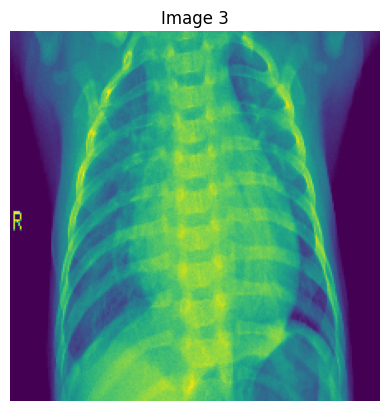

In [ ]:
#Displaying images of Pneumonia
DF1.sample(frac=1).reset_index(drop=True)
images_pneumonia= DF1[DF1.labels==1]
for i in range(3):
    image_data = images_pneumonia['mat_images'][i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')

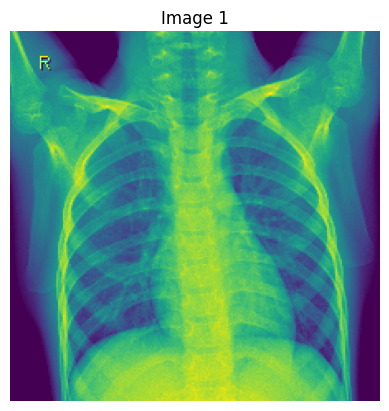

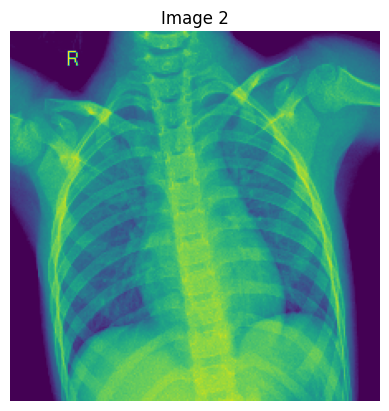

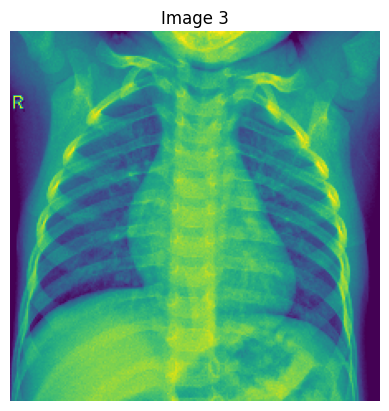

In [ ]:
#Displaying normal images
images_normal= DF1[DF1.labels==0].mat_images
images_normal=images_normal.reset_index(drop=True)

for i in range(3):
    image_data = images_normal[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')



## Importing Tuberculosis dataset

In [ ]:
DATA2_TRAIN_NORMAL="/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/"
DATA2_TRAIN_Tuberculosis="/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/"


### Get names of files in folder (names of images) by path of folder

In [ ]:

# Define paths based on the dataset structure
DATA2_TRAIN_NORMAL = "TB_Chest_Radiography_Database/Normal/"
DATA2_TRAIN_TUBERCULOSIS = "TB_Chest_Radiography_Database/Tuberculosis/"

# List images in each folder
Normal_img = os.listdir(DATA2_TRAIN_NORMAL)
Tuberculosis_img = os.listdir(DATA2_TRAIN_TUBERCULOSIS)

# Create a DataFrame for Normal images
dnorm = pd.DataFrame(Normal_img, columns=["images"])
dnorm["labels"] = 0  # Assign label 0 for normal
dnorm["images"] = dnorm["images"].apply(lambda x: os.path.join(DATA2_TRAIN_NORMAL, x))

# Create a DataFrame for Tuberculosis images
dtuber = pd.DataFrame(Tuberculosis_img, columns=["images"])
dtuber["labels"] = 2  # Assign label 2 for tuberculosis
dtuber["images"] = dtuber["images"].apply(lambda x: os.path.join(DATA2_TRAIN_TUBERCULOSIS, x))

# Concatenate the DataFrames
DF2 = pd.concat([dnorm, dtuber], ignore_index=True)

# Add resized image arrays to the dataset
DF2["mat_images"] = DF2["images"].apply(lambda x: cv2.resize(cv2.imread(x, 0), (224, 224)))

# Shuffle the DataFrame
DF2 = DF2.sample(frac=1, random_state=42).reset_index(drop=True)

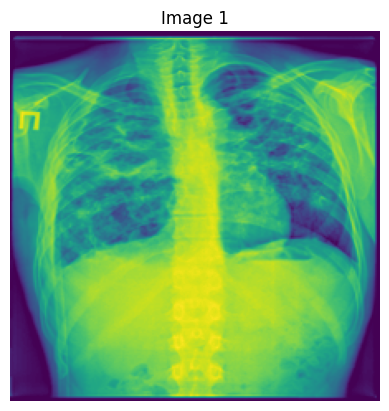

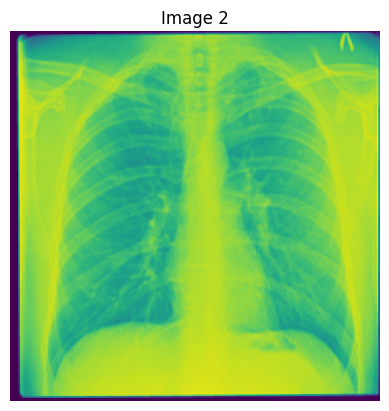

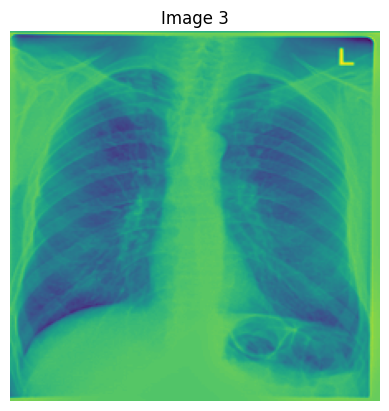

In [ ]:
#Displaying TB images
DF2.sample(frac=1).reset_index(drop=True)
images_tb= DF2[DF2.labels==2].mat_images
images_tb=images_tb.reset_index(drop=True)
for i in range(3):
    image_data = images_tb[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')  # Remove axis labels

## Concating TB and Pneumonia datasets

In [ ]:
#Final dataframe
df=pd.concat([DF1,DF2],ignore_index=True)
df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,images,labels,mat_images
0,chest_xray/train/PNEUMONIA/person586_bacteria_...,1,"[[2, 1, 0, 1, 2, 13, 20, 22, 23, 30, 33, 34, 3..."
1,chest_xray/train/PNEUMONIA/person441_virus_894...,1,"[[0, 0, 0, 0, 0, 0, 11, 17, 31, 33, 37, 37, 40..."
2,chest_xray/train/PNEUMONIA/person512_bacteria_...,1,"[[30, 30, 30, 30, 26, 32, 35, 43, 46, 46, 54, ..."
3,chest_xray/train/PNEUMONIA/person896_bacteria_...,1,"[[82, 88, 90, 84, 86, 82, 83, 86, 88, 87, 90, ..."
4,chest_xray/train/PNEUMONIA/person1696_bacteria...,1,"[[52, 62, 50, 46, 66, 72, 76, 84, 81, 88, 84, ..."
...,...,...,...
10051,TB_Chest_Radiography_Database/Normal/Normal-23...,0,"[[0, 0, 0, 1, 0, 173, 112, 78, 56, 44, 39, 38,..."
10052,TB_Chest_Radiography_Database/Normal/Normal-88...,0,"[[20, 9, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4..."
10053,TB_Chest_Radiography_Database/Normal/Normal-31...,0,"[[23, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
10054,TB_Chest_Radiography_Database/Tuberculosis/Tub...,2,"[[2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3,..."


In [ ]:
df.labels.value_counts()

,count
labels,
0,5083
1,4273
2,700


<Axes: xlabel='count', ylabel='labels'>

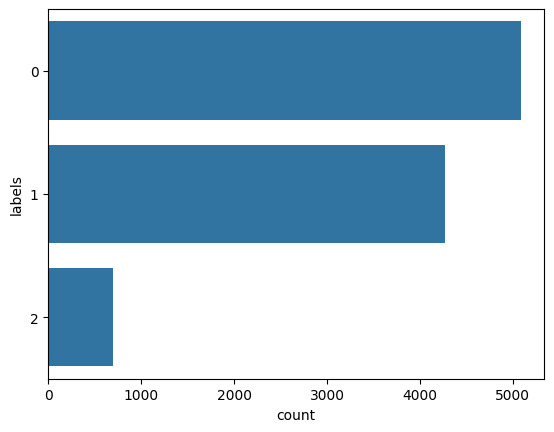

In [ ]:
sns.countplot(y='labels',data=df)

### 0: Normal  
### 1: Pneumonia    
### 2: Tuberculosis

## Seperating X and Y

In [ ]:
X=df["mat_images"]
y=df["labels"]

## Normalization of Data


In [ ]:
X=X/255

In [ ]:
X.shape

(10056,)

In [ ]:
y

,labels
0,1
1,1
2,1
3,1
4,1
...,...
10051,0
10052,0
10053,0
10054,2


In [ ]:
Y=to_categorical(y,3)
# The class labels [0, 1, 2] will be transformed into the following one-hot encoded format:
# 0 becomes [1, 0, 0]
# 1 becomes [0, 1, 0]
# 2 becomes [0, 0, 1]
Y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Splitting the dataset into Training and Testing datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044,)
(8044, 3)
(2012,)
(2012, 3)


In [ ]:
X[0]

array([[0.00784314, 0.00392157, 0.        , ..., 0.32156863, 0.31764706,
        0.31372549],
       [0.01176471, 0.00392157, 0.00392157, ..., 0.32156863, 0.32156863,
        0.31764706],
       [0.01568627, 0.00784314, 0.00784314, ..., 0.32156863, 0.32156863,
        0.31764706],
       ...,
       [0.40392157, 0.42745098, 0.44313725, ..., 0.32941176, 0.28627451,
        0.24705882],
       [0.40392157, 0.41960784, 0.42745098, ..., 0.3254902 , 0.28235294,
        0.24313725],
       [0.4       , 0.41960784, 0.43529412, ..., 0.3254902 , 0.28627451,
        0.23921569]])

## Converting the features into NumPy arrays

In [ ]:
def preprocess_image(image_array):
    """
    Preprocesses an image array.

    Args:
        image_array: NumPy array representing the image.

    Returns:
        Preprocessed image array.
    """
    # Resize the image to (224, 224) if it's not already
    image = cv2.resize(image_array, (224, 224))
    # Convert image to float32
    image = image.astype(np.float32)
    # Normalize image (optional)
    image /= 255.0
    return image

# Process all images in X_train
X_train = np.array([preprocess_image(x) for x in X_train], dtype=np.float32)

# Convert X_train to a TensorFlow tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [ ]:
#X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object) # creating an np array X_train that contains all images in type np array
#X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)




In [ ]:
X_train[0]

<tf.Tensor: shape=(224, 224), dtype=float32, numpy=
array([[0.00046136, 0.00055363, 0.00059977, ..., 0.00055363, 0.0002922 ,
        0.00023068],
       [0.0005075 , 0.00059977, 0.00059977, ..., 0.00052288, 0.00039985,
        0.0002922 ],
       [0.00058439, 0.00059977, 0.00061515, ..., 0.0005075 , 0.00038447,
        0.00033833],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>

In [ ]:
X[0]

array([[0.00784314, 0.00392157, 0.        , ..., 0.32156863, 0.31764706,
        0.31372549],
       [0.01176471, 0.00392157, 0.00392157, ..., 0.32156863, 0.32156863,
        0.31764706],
       [0.01568627, 0.00784314, 0.00784314, ..., 0.32156863, 0.32156863,
        0.31764706],
       ...,
       [0.40392157, 0.42745098, 0.44313725, ..., 0.32941176, 0.28627451,
        0.24705882],
       [0.40392157, 0.41960784, 0.42745098, ..., 0.3254902 , 0.28235294,
        0.24313725],
       [0.4       , 0.41960784, 0.43529412, ..., 0.3254902 , 0.28627451,
        0.23921569]])

In [ ]:
def preprocess_image(image_array):
    """
    Preprocesses an image array.

    Args:
        image_array: NumPy array representing the image.

    Returns:
        Preprocessed image array.
    """
    # Resize the image to (224, 224) if it's not already
    image = cv2.resize(image_array, (224, 224))
    # Convert image to float32
    image = image.astype(np.float32)
    # Normalize image (optional)
    image /= 255.0
    return image

# Process all images in X_test
X_test = np.array([preprocess_image(x) for x in X_test], dtype=np.float32)

# Convert X_test to a TensorFlow tensor
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [ ]:
#X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
#_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044, 224, 224)
(8044, 3)
(2012, 224, 224)
(2012, 3)


## Creating a Model

In [ ]:
## CNN Model
layers = [
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
]

# Create a Sequential model and pass the layers list
model_1 = Sequential(layers)

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=64,verbose= True, steps_per_epoch=40)

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - accuracy: 0.4958 - loss: 0.8957 - val_accuracy: 0.5104 - val_loss: 0.8770
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 301ms/step - accuracy: 0.5047 - loss: 0.9168 - val_accuracy: 0.5099 - val_loss: 0.8554
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.5993 - loss: 0.7828 - val_accuracy: 0.8096 - val_loss: 0.4812
Epoch 4/25
 6/40 ━━━━━━━━━━━━━━━━━━━━ 1:49 3s/step - accuracy: 0.8184 - loss: 0.4819 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 478ms/step - accuracy: 0.8326 - loss: 0.4449 - val_accuracy: 0.8047 - val_loss: 0.4902
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - accuracy: 0.8114 - loss: 0.4546 - val_accuracy: 0.8703 - val_loss: 0.3486
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.8624 - loss: 0.3513 - val_accuracy: 0.8743 - val_loss: 0.3245
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - accuracy: 0.8934 - loss: 0.2981 - val_accuracy: 0.8842 - val_loss: 0.3010
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.9066 - loss: 0.2389 - val_accuracy: 0.8822 - val_loss: 0.3151
Epoch 9/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.8891 - loss: 0.2842 - val_accuracy: 0.9061 - val_loss: 0.2595
Epoch 10/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 290ms/step - accuracy: 0.9119 - loss: 0.2571 - val_accuracy: 0.8902 - val_loss: 0.2985
Epoch 11/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - accuracy: 0.9022 - loss: 0.2551 - val_accuracy: 0.905

## Plotting the Model

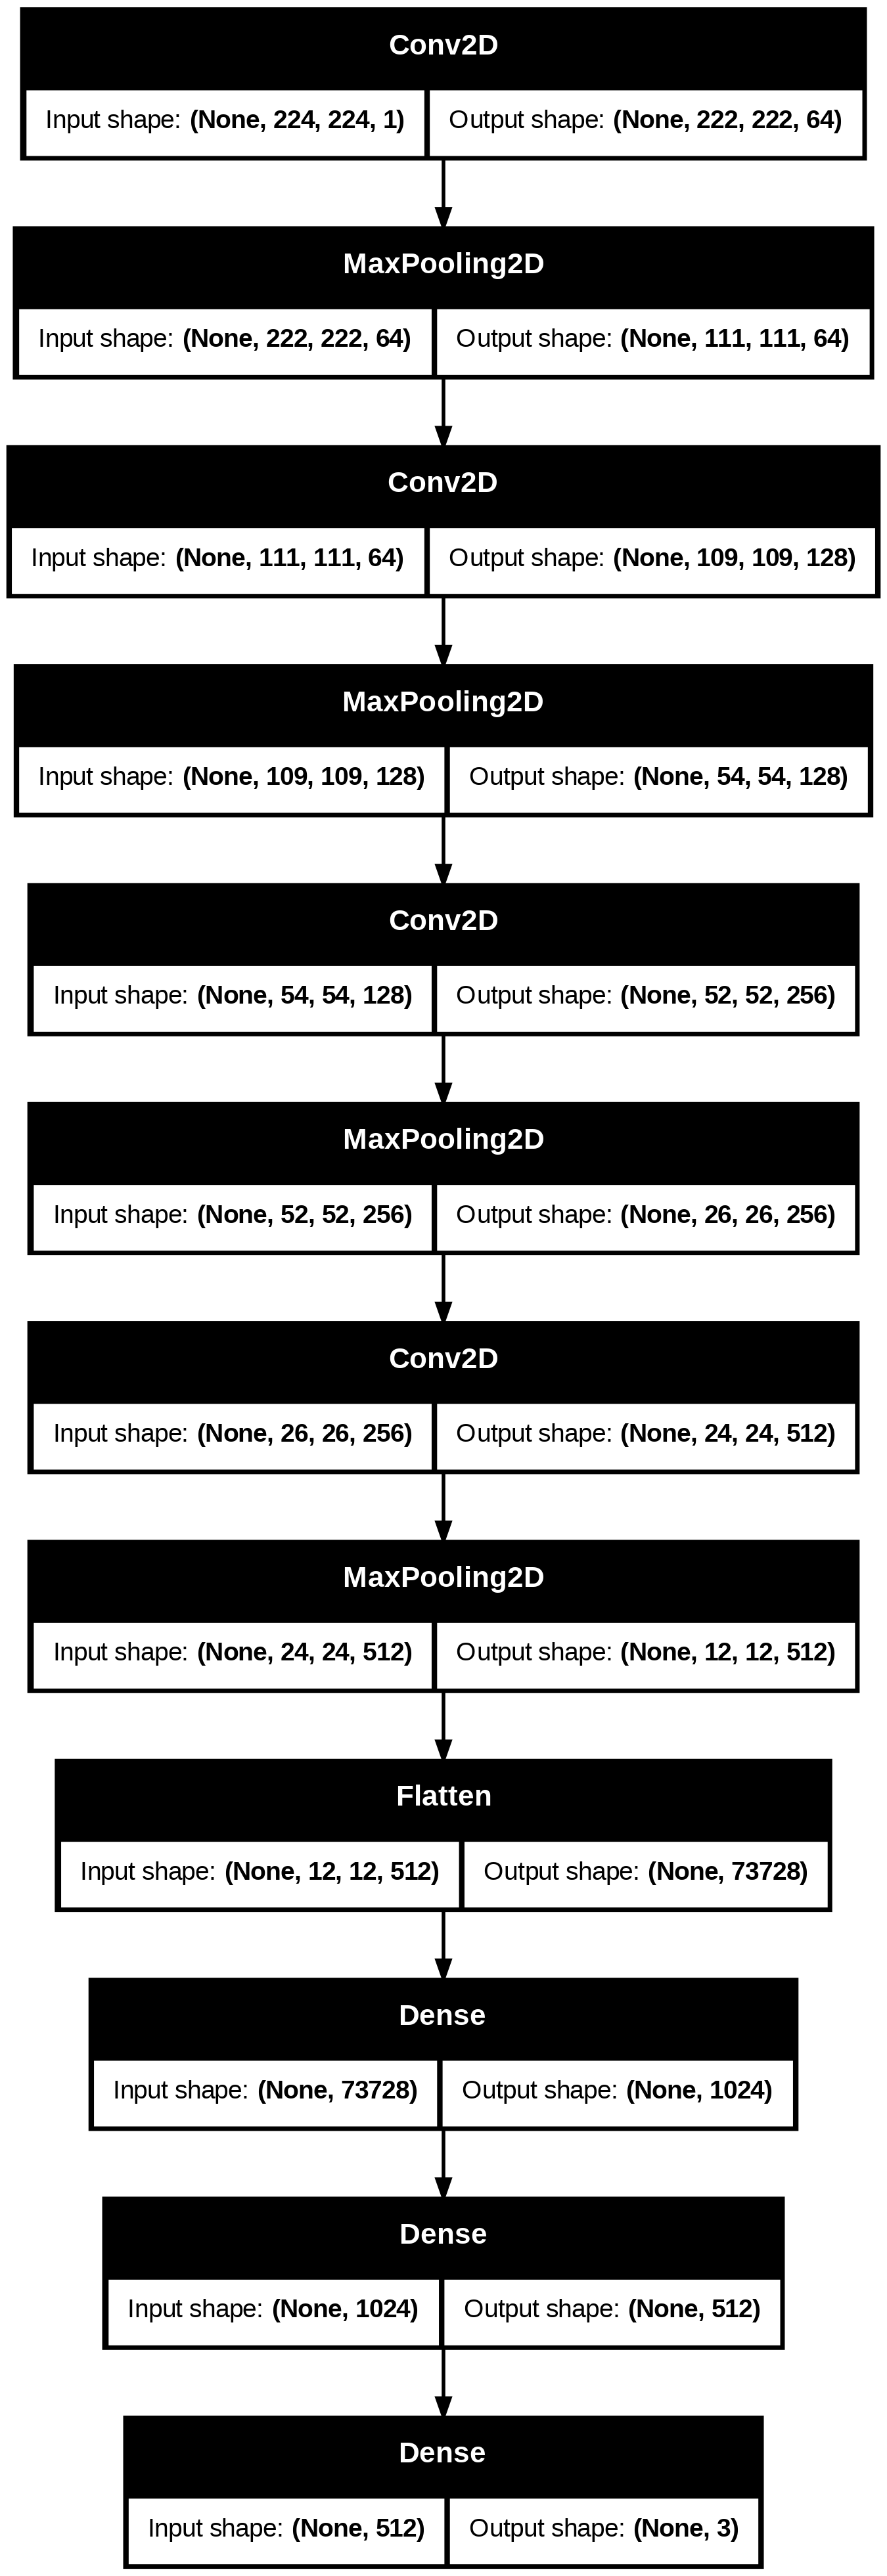

In [ ]:
## Save the model diagram to a file (e.g., 'model_diagram.png')
plot_model(model_1, to_file='model_diagram.png', show_shapes=True)
plot_model(model_1, show_shapes=True)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      75,498,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,723,979 (887.77 MB)

 Trainable params: 77,574,659 (295.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 155,149,320 (591.85 MB)

## Training the Model

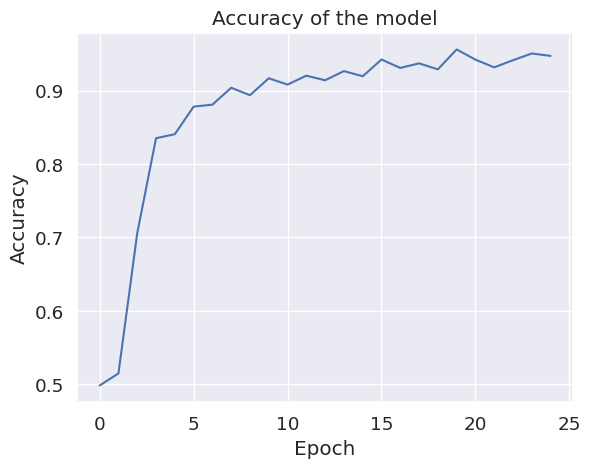

In [ ]:
plt.plot(model_1.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

## Making Predictions

In [ ]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
y_pred = model_1.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [ ]:
y_pred = model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


array([2, 1, 1, ..., 0, 1, 1])

In [ ]:
y_test.shape

(2012, 3)

In [ ]:
np.unique(y_true)

array([0, 1, 2])

## Results

In [ ]:
pd.Series(y_true).value_counts()

,count
0,1027
1,857
2,128


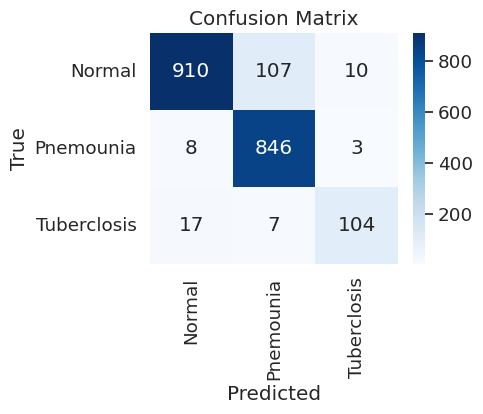

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True , fmt="d", cmap="Blues", xticklabels=['Normal', 'Pnemounia', 'Tuberclosis'], yticklabels=['Normal', 'Pnemounia', 'Tuberclosis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam

# Recompile the model
loaded_model.compile(optimizer=Adam(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [ ]:
# Save the trained model
model_1.save('model_1.h5')
